In [4]:
import pandas as pd

In [5]:
ORIGINAL_DIR = "../Original-Data/"
ANALYSIS_DIR = "../Analysis-Data/"

In [33]:
df = pd.read_csv(f"{ORIGINAL_DIR}measurements.csv", nrows=10)
df.head()

,Captured Time,Latitude,Longitude,Value,Unit,Location Name,Device ID,MD5Sum,Height,Surface,Radiation,Uploaded Time,Loader ID
0,2020-02-03 17:00:00,37.507552,139.941170,72,cpm,NaN,NaN,6449bbf7ce3b30a8e05bc23a0bc40644,NaN,NaN,NaN,2020-02-03 17:00:00,633
1,2020-02-03 11:00:00,37.505445,0.016667,68,cpm,NaN,NaN,a166df14f60b61095693684fc0f89c54,NaN,NaN,NaN,2020-02-03 11:00:00,614
2,2020-02-03 11:00:00,37.507250,139.940000,55,cpm,NaN,NaN,2fa8bccef282796bcdc297679c4db5b3,NaN,NaN,NaN,2020-02-03 11:00:00,614
3,2020-02-01 03:00:00,34.066487,-118.895217,50,cpm,NaN,NaN,da79c21520d3ff3f5ed010a70f4a6d29,NaN,NaN,NaN,2020-02-01 03:00:00,507
4,2020-02-01 01:00:00,37.673233,140.066667,48,cpm,NaN,NaN,6cdf740a2304a850185f74c0c4a4b878,NaN,NaN,NaN,2020-02-01 01:00:00,504


In [34]:
df = pd.read_csv(f"{ORIGINAL_DIR}measurements.csv", usecols=[0, 1, 2, 3, 4, 8])

In [35]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  82643234


In [36]:
df.columns = ['time', 'lat', 'lon', 'value', 'unit', 'height']
df.head()

,time,lat,lon,value,unit,height
0,2020-02-03 17:00:00,37.507552,139.941170,72.0,cpm,NaN
1,2020-02-03 11:00:00,37.505445,0.016667,68.0,cpm,NaN
2,2020-02-03 11:00:00,37.507250,139.940000,55.0,cpm,NaN
3,2020-02-01 03:00:00,34.066487,-118.895217,50.0,cpm,NaN
4,2020-02-01 01:00:00,37.673233,140.066667,48.0,cpm,NaN


In [37]:
df['time'].isna().sum()

1098

In [38]:
df['lat'].isna().sum()

4365

In [39]:
df['lon'].isna().sum()

4365

In [40]:
df['value'].isna().sum()

85978

In [41]:
df['unit'].isna().sum()

0

In [42]:
df['height'].isna().sum()

71547327

In [43]:
# Drop any in cols
df.dropna(subset = ['time', 'lat', 'lon', 'value', 'unit'], inplace=True)
print('Number of measurements: ', df.shape[0])

Number of measurements:  82551793


In [44]:
pd.unique(df['unit']) 

array(['cpm', 'status', 'celcius', 'usv', 'CPM', 'usv/hr', 'NOXppm',
       'pm2.5', 'PM10', 'HUMD%', 'PM1', 'PM2.5', 'TEMPC', 'DeviceType2',
       'DeviceType1', 'uSv/h', 'uSv/hr', 'uSv', 'Cpm', ' cpm',
       'microsievert', '1', '0', 'RSSI'], dtype=object)

In [45]:
# Keeping only cpm (counts per minutes)
df = df[df.unit == 'cpm']

In [46]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  79093214


In [47]:
df.head()

,time,lat,lon,value,unit,height
0,2020-02-03 17:00:00,37.507552,139.941170,72.0,cpm,NaN
1,2020-02-03 11:00:00,37.505445,0.016667,68.0,cpm,NaN
2,2020-02-03 11:00:00,37.507250,139.940000,55.0,cpm,NaN
3,2020-02-01 03:00:00,34.066487,-118.895217,50.0,cpm,NaN
4,2020-02-01 01:00:00,37.673233,140.066667,48.0,cpm,NaN


In [48]:
pd.unique(df['unit']) 

array(['cpm'], dtype=object)

In [49]:
# Convert cpm to µSv/h
# https://www.kaggle.com/safecast/safecast
df.value = df.value / 334

In [50]:
df.head()

,time,lat,lon,value,unit,height
0,2020-02-03 17:00:00,37.507552,139.941170,0.215569,cpm,NaN
1,2020-02-03 11:00:00,37.505445,0.016667,0.203593,cpm,NaN
2,2020-02-03 11:00:00,37.507250,139.940000,0.164671,cpm,NaN
3,2020-02-01 03:00:00,34.066487,-118.895217,0.149701,cpm,NaN
4,2020-02-01 01:00:00,37.673233,140.066667,0.143713,cpm,NaN


In [53]:
df.loc[df['unit'] == 'cpm', ['unit']] = 'usv/h'

In [54]:
df.head()

,time,lat,lon,value,unit,height
0,2020-02-03 17:00:00,37.507552,139.941170,0.215569,usv/h,NaN
1,2020-02-03 11:00:00,37.505445,0.016667,0.203593,usv/h,NaN
2,2020-02-03 11:00:00,37.507250,139.940000,0.164671,usv/h,NaN
3,2020-02-01 03:00:00,34.066487,-118.895217,0.149701,usv/h,NaN
4,2020-02-01 01:00:00,37.673233,140.066667,0.143713,usv/h,NaN


In [55]:
# Keep only positive values
df = df[df.value > 0]

In [56]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  78603728


In [57]:
df.head()

,time,lat,lon,value,unit,height
0,2020-02-03 17:00:00,37.507552,139.941170,0.215569,usv/h,NaN
1,2020-02-03 11:00:00,37.505445,0.016667,0.203593,usv/h,NaN
2,2020-02-03 11:00:00,37.507250,139.940000,0.164671,usv/h,NaN
3,2020-02-01 03:00:00,34.066487,-118.895217,0.149701,usv/h,NaN
4,2020-02-01 01:00:00,37.673233,140.066667,0.143713,usv/h,NaN


In [61]:
idx_min = df[['value']].idxmin() 
print(df.loc[idx_min])

                         time        lat       lon     value   unit  height
71285559  2013-06-29 15:38:55  51.517472 -0.089954  0.000024  usv/h     NaN


In [62]:
idx_max = df[['value']].idxmax() 
print(df.loc[idx_max])

                         time      lat       lon         value   unit  height
59097068  2014-10-31 04:36:00  35.6617  139.7447  2.571837e+06  usv/h     NaN


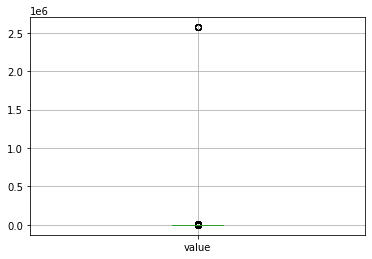

In [63]:
boxplot = df.boxplot(column=['value'])

In [64]:
df['value'].nlargest(10)

59097068    2.571837e+06
59097069    2.571837e+06
59097074    2.571837e+06
59097075    2.571837e+06
59097076    2.571837e+06
59097079    2.571837e+06
59097082    2.571837e+06
59097083    2.571837e+06
55025964    1.009919e+04
29620756    8.059659e+03
Name: value, dtype: float64

In [66]:
df['value'].nlargest(100)

59097068    2.571837e+06
59097069    2.571837e+06
59097074    2.571837e+06
59097075    2.571837e+06
59097076    2.571837e+06
                ...     
29620630    7.980452e+03
29620766    7.980344e+03
29620300    7.980237e+03
29622744    7.980237e+03
29623229    7.980237e+03
Name: value, Length: 100, dtype: float64

In [68]:
Q1 = df['value'].quantile(.25)
Q3 = df['value'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df1 = df[df['value'].between(q1, q3)]

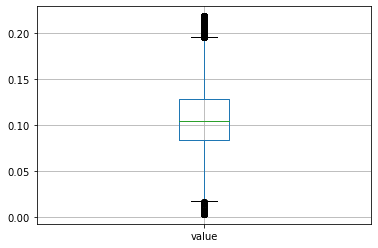

In [69]:
boxplot = df1.boxplot(column=['value'])

In [71]:
idx_min = df1[['value']].idxmin() 
print(df1.loc[idx_min])

                     time       lat        lon     value   unit  height
5249  2017-12-03 21:28:38  35.74591  139.91815  0.002994  usv/h    20.0


In [72]:
idx_max = df1[['value']].idxmax() 
print(df1.loc[idx_max])

                     time        lat         lon     value   unit  height
1084  2017-12-04 00:11:37  37.796306  140.514413  0.218563  usv/h    65.0


In [73]:
df1.head()

,time,lat,lon,value,unit,height
0,2020-02-03 17:00:00,37.507552,139.941170,0.215569,usv/h,NaN
1,2020-02-03 11:00:00,37.505445,0.016667,0.203593,usv/h,NaN
2,2020-02-03 11:00:00,37.507250,139.940000,0.164671,usv/h,NaN
3,2020-02-01 03:00:00,34.066487,-118.895217,0.149701,usv/h,NaN
4,2020-02-01 01:00:00,37.673233,140.066667,0.143713,usv/h,NaN


In [74]:
print('Number of measurements: ', df1.shape[0])

Number of measurements:  72728586


In [75]:
df1.to_csv(f"{ANALYSIS_DIR}measurements-final-01.csv", index=False)

In [6]:
df1 = pd.read_csv(f"{ANALYSIS_DIR}measurements-final-01.csv", usecols=[0, 1, 2, 3])

In [7]:
print('Number of measurements: ', df1.shape[0])

Number of measurements:  72728586


In [8]:
df1.head()

,time,lat,lon,value
0,2020-02-03 17:00:00,37.507552,139.941170,0.215569
1,2020-02-03 11:00:00,37.505445,0.016667,0.203593
2,2020-02-03 11:00:00,37.507250,139.940000,0.164671
3,2020-02-01 03:00:00,34.066487,-118.895217,0.149701
4,2020-02-01 01:00:00,37.673233,140.066667,0.143713


In [9]:
df1.to_csv(f"{ANALYSIS_DIR}measurements-final-01-without-height.csv", index=False)

***Visualization***

In [10]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend
import warnings
warnings.filterwarnings('ignore')

from bokeh.io import output_notebook, show

In [11]:
plot_width  = int(800)
plot_height = int(plot_width//1.2)

In [12]:
def draw_map(df, plot_width, plot_height, colors, agg_func, interp, background_col):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
    agg = cvs.points(df, 'lon', 'lat',  agg_func('value'))
    img = tf.shade(agg, cmap=colors, how=interp)
    return tf.set_background(img, color=background_col)

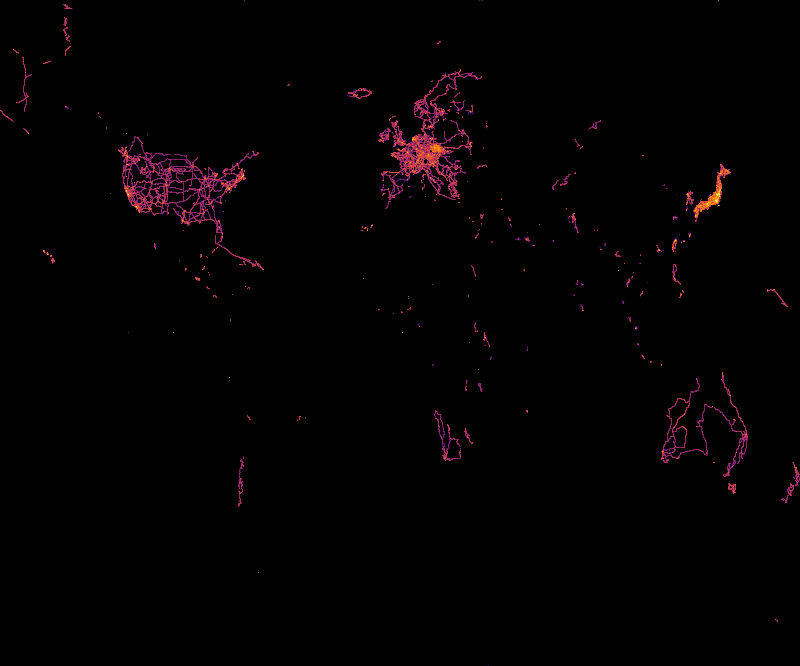

In [13]:
img = draw_map(df1, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [14]:
x_min_jpn, y_min_jpn, x_max_jpn, y_max_jpn = 128.03, 30.22, 148.65, 45.83
df_jpn = df1[(df1.lon > x_min_jpn) & (df1.lon < x_max_jpn) & (df1.lat > y_min_jpn) & (df1.lat < y_max_jpn)]

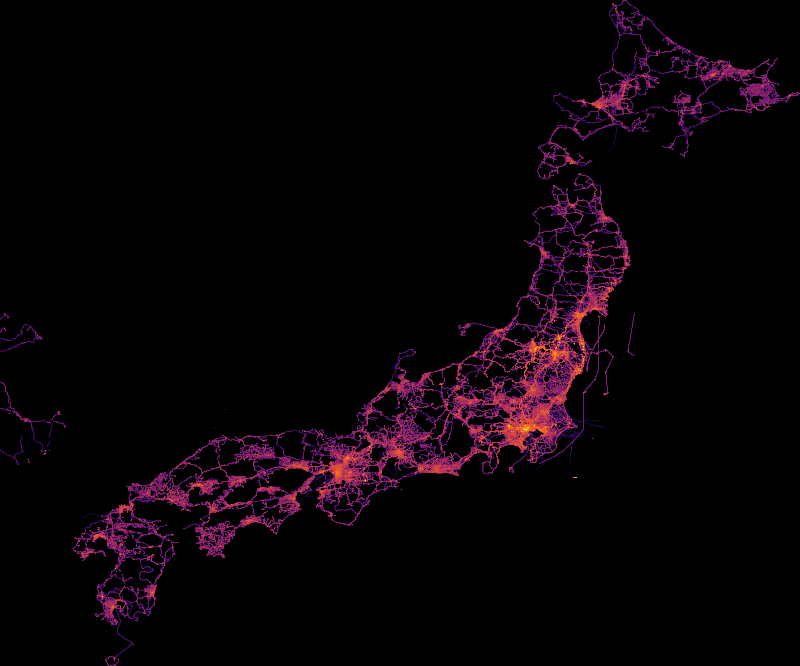

In [15]:
img = draw_map(df_jpn, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [17]:
x_min_fk, y_min_fk, x_max_fk, y_max_fk = 140.0166, 37.0047, 141.2251, 38.195
df_fk= df1[(df1.lon > x_min_fk) & (df1.lon < x_max_fk) & (df1.lat > y_min_fk) & (df1.lat < y_max_fk)]

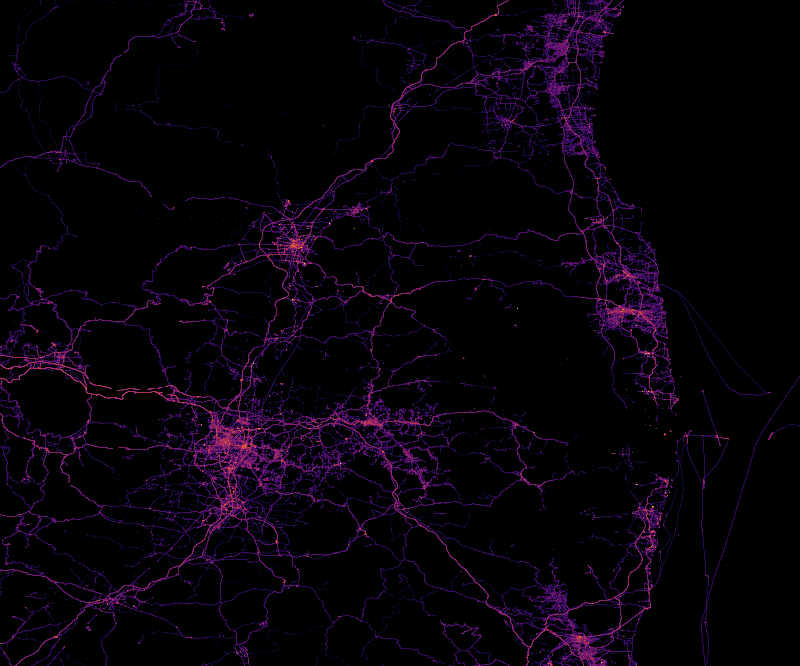

In [18]:
img = draw_map(df_fk, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img